# Start

In [ ]:
pip install qutip
! sudo apt-get install texlive-latex-recommended
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
!sudo apt install cm-super

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 34.9 MB/s eta 0:00:00


## Functions/Libraries

In [ ]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from qutip import basis, coherent, destroy, expect, isket, ket2dm, mesolve, num, variance, wigner

from matplotlib import rc
rc('text', usetex=True)
rc('xtick', labelsize=14)
rc('ytick', labelsize=14)
rc ('axes', labelsize=14)




def cal_g2(J, Omega_q, Omega_m, kappa):
    A = 2*J**2*(3*Omega_m**2 + Omega_q**2 - 4*Omega_m*Omega_q) - Omega_m**2*kappa**2
    B = 4*J*kappa*(Omega_m*Omega_q - Omega_m**2)
    term1 = 4*J*(Omega_q - Omega_m) + 2j*Omega_m*kappa
    term2 = kappa**2 + 4j*J*kappa

    Cg1 = -term1 / term2

    term3 = 2*np.sqrt(2) * (A + B*1j)
    term4 = kappa**2 - 2*J**2 + 4j*J*kappa
    term5 = kappa**2 + 4j*J*kappa

    Cg2 =  term3 / (term4 * term5)
    g2_0=  2*np.abs(Cg2)**2/(np.abs(Cg1)**4)
    return g2_0



## Constants

In [ ]:
e=1.602*10**-19
uo = 4*np.pi* 10**-7
h  = 6.62607* 10**-34
h_cut = h/(2*np.pi)
kb = 1.380649 * 10**-23

# Main

#### Fig 1

In [ ]:
Oq=3*2*np.pi*0.1*10**6
Om=2*np.pi*0.1*10**6
J =2*np.pi*20*10**6
K =2*np.pi*10**6
Dmin=0
y=[5,7,10,15,20]
xz=['-.','--','-.',':','--']
mz=['o','>','v','s','x']
x=np.linspace(0,25/K,100)
N=20
c=tensor(destroy(2),qeye(N))
m=tensor(qeye(2),destroy(N))
d=[np.sqrt(K)*c,np.sqrt(K)*m]
time=6*10**-6
r=100
t=np.linspace(0,time,r)
rho = ket2dm(tensor(basis(2,0),basis(N,0)+basis(N,1)))
sd=0
for f in y:
  g=[]
  Dp=0.1*f*J
  H_eff = (Dp - Dmin) *c.dag()*c  +  (Dp + Dmin) * m.dag()*m +  J * (c.dag()*m+c*m.dag()) + Om * (m.dag()+m) + Oq * (c.dag()+c)
  result=mesolve(H_eff,rho,t,d,[]).states
  for l in range(r):
    e2=expect(m.dag()*m.dag()*m*m,result[l])
    e1=expect(m.dag()*m,result[l])
    g.append(np.log10(e2/e1**2))
  plt.plot(K*t,g,label='$\Delta_+$'+'/ J ='+str(f/10),linestyle=xz[sd],marker=mz[sd],markevery=7)
  sd+=1
font1 = {'family':'serif','color':'grey','size':20}
font2 = {'family':'serif','color':'black','size':15}
plt.xlabel(" $\kappa t$ ",fontdict=font2)
plt.ylabel(" $log_{10}g^{(2)}(t,t)$",fontdict=font2)
plt.xlim(0,40)
plt.legend(loc='lower right')
plt.savefig("fig 1.pdf",format='pdf')
plt.show()

#### Fig 2

In [ ]:
# Steady State
Oq=3*2*np.pi*0.1*10**6
Om=2*np.pi*0.1*10**6
J =2*np.pi*20*10**6
K =2*np.pi*10**6
y=[5,7,10,15,20]
x=np.linspace(-1,1,100)
N=20
c=tensor(destroy(2),qeye(N))
m=tensor(qeye(2),destroy(N))
d=[np.sqrt(K/2)*c,np.sqrt(K/2)*m]
xz=['-','--','-.',':',':']
mz=['v','s','o','>','x']
sd=0
for f in y:
  g=[]
  Dp=0.1*f*J
  for l in x:
    Dmin=l*Dp
    H_eff = (Dp - Dmin) *c.dag()*c  +  (Dp + Dmin) * m.dag()*m +  J * (c.dag()*m+c*m.dag()) + Om * (m.dag()+m) + Oq * (c.dag()+c)
    state=steadystate(H_eff,d)
    e2=expect(m.dag()*m.dag()*m*m,state)
    e1=expect(m.dag()*m,state)
    g.append(np.log10(e2/e1**2))
  plt.plot(x,g,label='$\Delta_+$/ J ='+str(f/10),marker=mz[sd],linestyle=xz[sd],markevery=7)
  sd+=1
font1 = {'family':'serif','color':'grey','size':20}
font2 = {'family':'serif','color':'black','size':15}
plt.xlabel(" $\Delta _- / \Delta _+$ ",fontdict=font2)
plt.ylabel(" $log_{10}g^{(2)}(0)$",fontdict=font2)
plt.legend()
plt.savefig("fig 2.pdf",format='pdf')
plt.show()

#### Fig 3

In [ ]:
Om=2*np.pi*0.1*10**6
J =2*np.pi*20*10**6
K =2*np.pi*10**6
y=[1,2,3,5,10]
#x=np.linspace(0.5,1.9,100)
x=np.linspace(-3,3,200)
N=20
c=tensor(destroy(2),qeye(N))
m=tensor(qeye(2),destroy(N))
d=[np.sqrt(K)*c,np.sqrt(K)*m]
xz=['-.',':','-','--','-.']
sd=0
for f in y:
  Oq=f*Om
  g=[]
  for l in x:
    Dp=l*J
    Dmin=0
    H_eff = (Dp - Dmin) *c.dag()*c  +  (Dp + Dmin) * m.dag()*m +  J * (c.dag()*m+c*m.dag()) + Om * (m.dag()+m) + Oq * (c.dag()+c)
    state=steadystate(H_eff,d)
    e2=expect(m.dag()*m.dag()*m*m,state)
    e1=expect(m.dag()*m,state)
    g.append(np.log10(e2/e1**2))
  plt.plot(x,g,label='$\\Omega_q$/ $\Omega_m$='+str(f),linestyle=xz[sd])#,linewidth='4')
  sd+=1
font1 = {'family':'serif','color':'grey','size':20}
font2 = {'family':'serif','color':'black','size':15}
plt.xlabel(" $\Delta _+ $/ $J$ ",fontdict=font2)
plt.ylabel(" $log_{10}g^{(2)}(0)$",fontdict=font2)
plt.legend()
#plt.xlim(0.6,1.95)
#plt.ylim(-3,-1.2)
#plt.tick_params(axis='both', which='major', labelsize=40)
plt.savefig("fig 3b.pdf",format='pdf')
plt.show()

#### Fig 4

In [ ]:
Om=2*np.pi*0.1*10**6
K =2*np.pi*10**6
y=[14,21,28,35]
x1=np.linspace(0,1.5,100)
x2=np.linspace(1.5,10,100)
x=np.concatenate((x1,x2))
N=20
c=tensor(destroy(2),qeye(N))
m=tensor(qeye(2),destroy(N))
d=[np.sqrt(K)*c,np.sqrt(K)*m]
xz=['-','--','-.','-']
sd=0
for f in y:
  J=f*2*np.pi*10**6
  Dp=J
  g=[]
  for l in x:
    Oq=l*Om
    H_eff = (Dp - Dmin) *c.dag()*c  +  (Dp + Dmin) * m.dag()*m +  J * (c.dag()*m+c*m.dag()) + Om * (m.dag()+m) + Oq * (c.dag()+c)
    state=steadystate(H_eff,d)
    e2=expect(m.dag()*m.dag()*m*m,state)
    e1=expect(m.dag()*m,state)
    g.append(np.log10(e2/e1**2))
  plt.plot(x,g,label='J / 2$\pi$ ='+str(f)+'MHz',ls=xz[sd])
  sd+=1
font1 = {'family':'serif','color':'grey','size':20}
font2 = {'family':'serif','color':'black','size':15}
plt.xlabel(" $\\Omega_q$/ $\Omega_m$ ",fontdict=font2)
plt.ylabel(" $log_{10}g^{(2)}(0)$",fontdict=font2)
plt.legend()
plt.savefig("fig 4.pdf",format='pdf')
plt.show()

#### Fig 5

In [ ]:
def cal_g20(J, Omega_q, Omega_m, kappa):
    A = 2*J**2*(3*Omega_m**2 + Omega_q**2 - 4*Omega_m*Omega_q) - Omega_m**2*kappa**2
    B = 4*J*kappa*(Omega_m*Omega_q - Omega_m**2)
    C = 2*J**2*(2*Omega_m**2 + Omega_q**2 - 3*Omega_m*Omega_q) + Omega_m*Omega_q*kappa**2
    D = J*kappa*(4*Omega_m*Omega_q - 2*Omega_m**2 - Omega_q**2)

    term1 = 4*J*(Omega_q - Omega_m) + 2j*Omega_m*kappa
    term2 = kappa**2 + 4j*J*kappa
    Cg1 = -term1 / term2

    term3 = 2*np.sqrt(2) * (A + B*1j)
    term4 = kappa**2 - 2*J**2 + 4j*J*kappa
    term5 = kappa**2 + 4j*J*kappa
    Cg2 =  term3 / (term4 * term5)

    term6 = -4*(C + D*1j)
    Ce1 = term6 / (term4 * term5)

    g2_0=  2*np.abs(Cg2)**2/(np.abs(Cg1)**2+np.abs(Ce1)**2+2*np.abs(Cg2)**2)**2
    return g2_0

In [ ]:
Om=2*np.pi*0.1*10**6
Dmin=0
y=[14,35]
z=[0.5,1]
x1=np.linspace(0,1.5,100)
x2=np.linspace(1.5,10,100)
x=np.concatenate((x1,x2))
xb=['-','--','-.','-']
sd=0
for f in range(2):
  J= 2*np.pi*10**6*y[f]
  for j in range(2):
    K=2*np.pi*10**6*z[j]
    Dp=J
    g=[]
    for l in x:
      Oq=l*Om
      state=cal_g2(J,Oq,Om,K)
      g.append(np.log10(state))
    plt.plot(x,g,linestyle=xb[sd],label='$J/2\pi=$'+str(y[f])+'MHz'+'     '+'$\kappa/2\pi=$'+str(z[j])+'MHz')
  sd+=1
font1 = {'family':'serif','color':'grey','size':20}
font2 = {'family':'serif','color':'black','size':15}
plt.xlabel(" $\\Omega_q$/ $\Omega_m$ ",fontdict=font2)
plt.ylabel(" $log_{10}g^{(2)}(0)$",fontdict=font2)
plt.legend()
plt.savefig("fig 5.pdf",format='pdf')
plt.show()

#### Fig 6 a

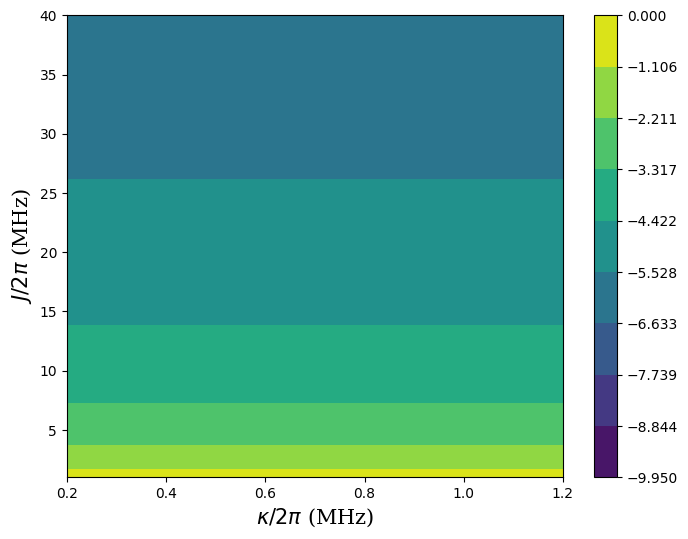

In [ ]:
K =2*np.pi*10**6
Om=2*np.pi*0.1*10**6
Dmin=0
Oq=3*Om
n=40
y1=np.linspace(0.2,1.2,n)
z1=np.linspace(1,40,n)
X1, Y1 = np.meshgrid(y1, z1)
N=40
c=tensor(destroy(2),qeye(N))
m=tensor(qeye(2),destroy(N))
d=[np.sqrt(K)*c,np.sqrt(K)*m]
g1=np.zeros((n,n))
i=0
for p in z1 :
  J= 2*np.pi*10**6*p
  Dp=J
  j=0
  for q in y1:
    K=2*np.pi*10**6*q
    Dp=J
    H_eff = (Dp - Dmin) *c.dag()*c  +  (Dp + Dmin) * m.dag()*m +  J * (c.dag()*m+c*m.dag()) + Om * (m.dag()+m) + Oq * (c.dag()+c)
    state=steadystate(H_eff,d)
    e2=expect(m.dag()*m.dag()*m*m,state)
    e1=expect(m.dag()*m,state)
    g2=(np.log10(e2/e1**2))
    g1[i,j]=g2
    j+=1
  i+=1

Z1=g1

plt.figure(figsize=(8, 6))
levels = np.linspace(-9.95, 0, 10)
plt.contourf(X1, Y1, Z1,levels=levels, cmap='viridis')  # Change the colormap as desired
plt.colorbar(label='')  # Add a colorbar indicating the values
font1 = {'family':'serif','color':'black','size':15}
plt.xlabel('$\kappa/2\pi$'+' (MHz)',fontdict=font1)
plt.ylabel('$J/2\pi$'+' (MHz)',fontdict=font1)
plt.grid(False)
plt.savefig("fig 6aN80n40L10.pdf",format='pdf',dpi=2000)
plt.show()

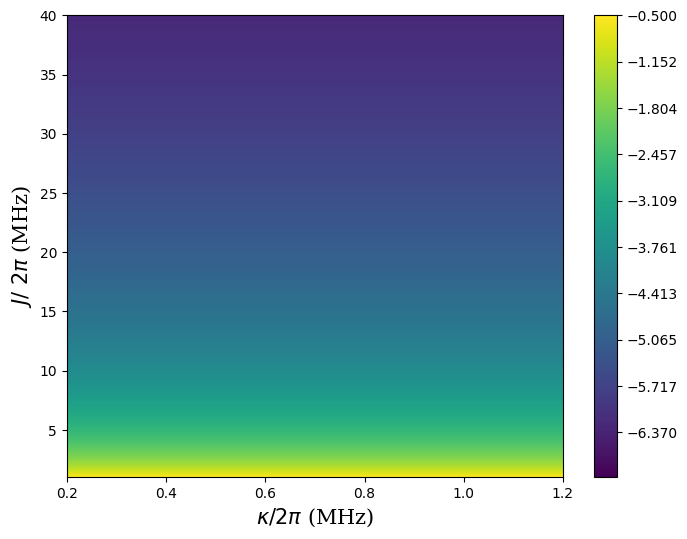

In [ ]:
plt.figure(figsize=(8, 6))
levels = np.linspace(-7, -0.5, 300)
plt.contourf(X1, Y1, Z1,levels=levels, cmap='viridis')  # Change the colormap as desired
plt.colorbar(label='')  # Add a colorbar indicating the values
font1 = {'family':'serif','color':'black','size':15}
plt.xlabel('$\kappa/2\pi$'+' (MHz)',fontdict=font1)
plt.ylabel('$J/$'+' '+'$2\pi$'+' (MHz)',fontdict=font1)
plt.grid(False)
plt.savefig("fig 6a300.pdf",format='pdf',dpi=2000)
plt.show()

#### Fig 6b

In [ ]:
Mhz = 2 * np.pi * 10**6
J=35*Mhz
Dp=J
Dmin=0

n=10
y=np.linspace(0.01,0.25,n)
x=np.linspace(0.2,1.2,n)
X, Y = np.meshgrid(x, y)
g=np.zeros((n,n))

N=100
c=tensor(destroy(2),qeye(N))
m=tensor(qeye(2),destroy(N))
i=0
for K in x:
  d=[np.sqrt(K*Mhz)*c,np.sqrt(K*Mhz)*m]
  j=0
  for O_m in y:
    Om=O_m*Mhz
    Oq=3*Om
    H_eff = (Dp - Dmin) *c.dag()*c  +  (Dp + Dmin) * m.dag()*m +  J * (c.dag()*m+c*m.dag()) + Om * (m.dag()+m) + Oq * (c.dag()+c)
    state=steadystate(H_eff,d)
    e2=expect(m.dag()*m.dag()*m*m,state)
    e1=expect(m.dag()*m,state)
    if e2 > 0:
      g2=(np.log10(e2/e1**2))
    else:
      g2=0
    g[i,j]=g2
    j+=1
  i+=1
A=g
plt.figure(figsize=(8, 6))
#levels = np.linspace(-13.1, -4, 1000)
#plt.contourf(X, Y, Z,levels=levels, cmap='viridis')
plt.contourf(X, Y, A)  # Change the colormap as desired
plt.colorbar(label='')  # Add a colorbar indicating the values
plt.xlabel('$\kappa/2\pi$'+' (MHz)')
plt.ylabel('$\Omega_m/2\pi$'+' (MHz)')
plt.grid(False)
plt.savefig("fig 6b.pdf",format='pdf')
plt.show()

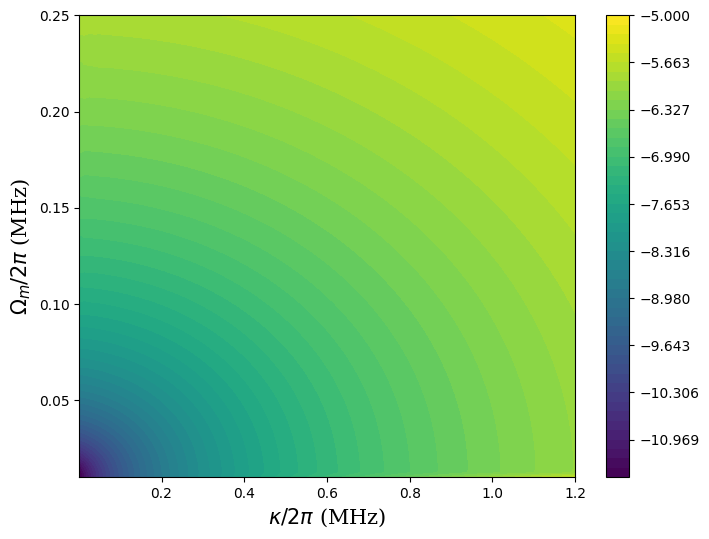

In [ ]:
plt.figure(figsize=(8, 6))
#levels = np.linspace(-11.5, -5, 50)
#plt.contourf(X, Y, Z,levels=levels, cmap='viridis')
plt.contourf(X, Y, A)  # Change the colormap as desired
plt.colorbar(label='')  # Add a colorbar indicating the values
font1 = {'family':'serif','color':'black','size':15}
plt.xlabel('$\kappa/2\pi$'+' (MHz)',fontdict=font1)
plt.ylabel('$\Omega_m/2\pi$'+' (MHz)',fontdict=font1)
plt.grid(False)
plt.savefig("fig 6bdef.pdf",format='pdf',dpi=1200)
plt.show()

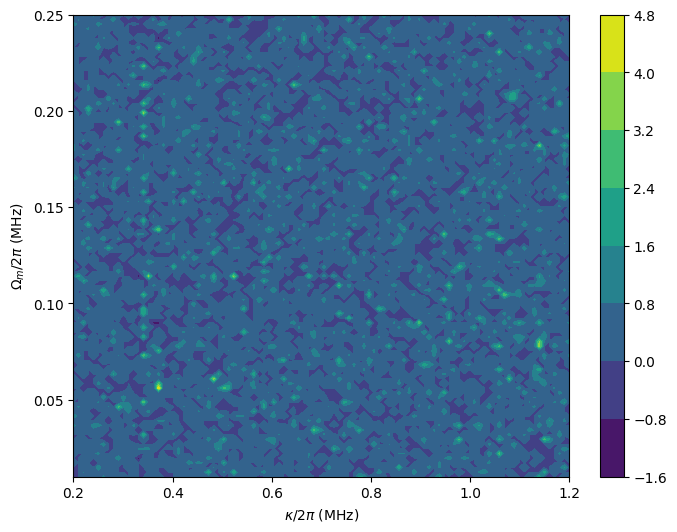

In [ ]:
J= 2*np.pi**35*10**6
Dp=J
Dmin=0
n=100
x=np.linspace(0.2,1.2,n)
y=np.linspace(0.01,0.25,n)
X, Y = np.meshgrid(x, y)
g=np.zeros((n,n))
N=10
c=tensor(destroy(2),qeye(N))
m=tensor(qeye(2),destroy(N))
i=0
for p in y :
  Om= 2*np.pi*p*10**6
  Oq=3*Om
  H_eff = (Dp - Dmin) *c.dag()*c  +  (Dp + Dmin) * m.dag()*m +  J * (c.dag()*m+c*m.dag()) + Om * (m.dag()+m) + Oq * (c.dag()+c)
  j=0
  for q in x:
    K=2*np.pi*q*10**6
    d=[np.sqrt(K)*c,np.sqrt(K)*m]
    state=steadystate(H_eff,d)
    e2=expect(m.dag()*m.dag()*m*m,state)
    e1=expect(m.dag()*m,state)
    if e2 > 0:
      g2=(np.log10(e2/e1**2))
    else:
      g2=0
    g[i,j]=g2
    j+=1
  i+=1
A=g
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, A)  # Change the colormap as desired
plt.colorbar(label='')  # Add a colorbar indicating the values
plt.xlabel('$\kappa/2\pi$'+' (MHz)')
plt.ylabel('$\Omega_m/2\pi$'+' (MHz)')
plt.grid(False)
plt.show()
plt.savefig("fig 1.pdf",format='pdf')

#### Fig 7a

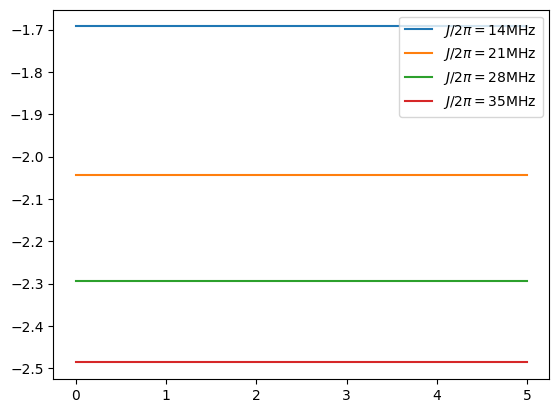

In [ ]:
K=0.5 * 2*np.pi*10**6
x=np.linspace(0.001,5,100)
y=[14,21,28,35]
for i in y:
  J= 2*np.pi*10**6 * i
  g=[]
  for jk in x:
    state=cal_g2(J, 2*np.pi*10**6 * jk, 3*2*np.pi*10**6 * jk, K)
    g.append(np.log10(state))
  plt.plot(x,g,label='$J/2\pi=$'+str(i)+'MHz')#+'     '+'$\kappa/2\pi=$'+str(z[j])+'MHz')
plt.legend()
plt.show()

#### Fig 7a Method 2

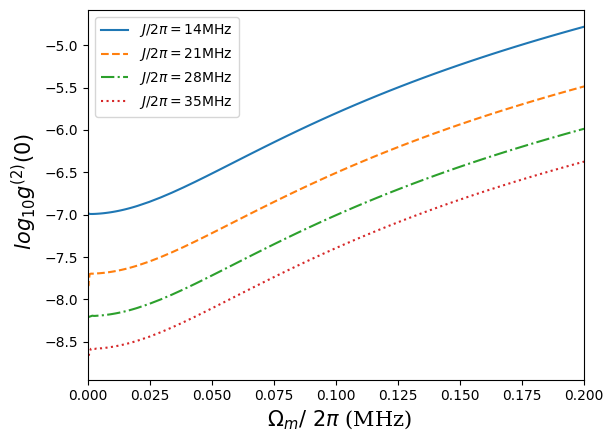

In [ ]:
K=0.5 * 2*np.pi*10**6
Dmin=0
N=10
c=tensor(destroy(2),qeye(N))
m=tensor(qeye(2),destroy(N))
d=[np.sqrt(K/2)*c,np.sqrt(K/2)*m]
x1=np.linspace(-0.001,0.02,40)
x2=np.linspace(0.02,0.2,40)
x= np.concatenate((x1,x2))
y=[14,21,28,35]
xz=['-','--','-.',':',':',]
sd=0
for i in y:
  J= 2*np.pi*10**6 * i
  Dp=J
  g=[]
  ad=0
  for jk in x:
    Om= 2*np.pi*10**6 * jk
    Oq= 3* Om
    H_eff = (Dp - Dmin) *c.dag()*c  +  (Dp + Dmin) * m.dag()*m +  J * (c.dag()*m+c*m.dag()) + Om * (m.dag()+m) + Oq * (c.dag()+c)
    state=steadystate(H_eff,d)
    e2=expect(m.dag()*m.dag()*m*m,state)
    e1=expect(m.dag()*m,state)
    if e2 > 0:
      g.append(np.log10(e2/e1**2))
    else:
      x=np.delete(x,ad)
    ad+=1
  plt.plot(x,g,label='$J/2\pi=$'+str(i)+'MHz',ls=xz[sd])
  sd+=1
font1 = {'family':'serif','color':'grey','size':20}
font2 = {'family':'serif','color':'black','size':15}
plt.xlim(0,0.2)
plt.xlabel(" $\Omega _m /$"+' '+"$2 \pi$"+" (MHz)",fontdict=font2)
plt.ylabel(" $log_{10}g^{(2)}(0)$",fontdict=font2)
plt.legend()
plt.savefig("fig 7a.pdf",format='pdf')
plt.show()

In [ ]:
K=0.5 * 2*np.pi*10**6
Dmin=0
N=100
c=tensor(destroy(2),qeye(N))
m=tensor(qeye(2),destroy(N))
d=[np.sqrt(K)*c,np.sqrt(K)*m]
x1=np.linspace(0.0001,0.01,50)
x2=np.linspace(0.01,0.2,50)
x= np.concatenate((x1,x2))
y=[14,21,28,35]
for i in y:
  J= 2*np.pi*10**6 * i
  Dp=J
  g=[]
  ad=0
  for jk in x:
    Om= 2*np.pi*10**6 * jk
    Oq= 3* Om
    H_eff = (Dp - Dmin) *c.dag()*c  +  (Dp + Dmin) * m.dag()*m +  J * (c.dag()*m+c*m.dag()) + Om * (m.dag()+m) + Oq * (c.dag()+c)
    state=steadystate(H_eff,d)
    e2=expect(m.dag()*m.dag()*m*m,state)
    e1=expect(m.dag()*m,state)
    if e2 > 0:
      g.append(np.log10(e2/e1**2))
    else:
      x=np.delete(x,ad)
    ad+=1
  plt.plot(x,g,label='$J/2\pi=$'+str(i)+'MHz')#+'     '+'$\kappa/2\pi=$'+str(z[j])+'MHz')
plt.legend()
plt.show()
plt.savefig("fig 7a.pdf",format='pdf')

#### Fig 7b

In [ ]:
J=35 * 2*np.pi*10**6
Dp=J
Dmin=0
N=100
c=tensor(destroy(2),qeye(N))
m=tensor(qeye(2),destroy(N))
x1=np.linspace(-0.0001,0.05,80)
x2=np.linspace(0.01,0.2,40)
x= np.concatenate((x1,x2))
y=[3,4,5,6]
for i in y:
  K= 2*np.pi*10**6 * i/10
  d=[np.sqrt(K)*c,np.sqrt(K)*m]
  g=[]
  ad=0
  for jk in x:
    Om= 2*np.pi*10**6 * jk
    Oq= 3* Om
    H_eff = (Dp - Dmin) *c.dag()*c  +  (Dp + Dmin) * m.dag()*m +  J * (c.dag()*m+c*m.dag()) + Om * (m.dag()+m) + Oq * (c.dag()+c)
    state=steadystate(H_eff,d)
    e2=expect(m.dag()*m.dag()*m*m,state)
    e1=expect(m.dag()*m,state)
    if e2 > 0:
      g.append(np.log10(e2/e1**2))
    else:
      x=np.delete(x,ad)
    ad+=1
  plt.plot(x,g,label='$\\kappa/2\pi=$'+str(i/10)+'MHz')
font2 = {'family':'serif','color':'black','size':15}
plt.xlim(0,0.2)
plt.xlabel(" $\Omega _m /$"+' '+"$2 \pi$"+" (MHz)",fontdict=font2)
plt.ylabel(" $log_{10}g^{(2)}(0)$",fontdict=font2)
plt.legend()
plt.savefig("fig 7b.pdf",format='pdf')
plt.show()

#### Fig 8a

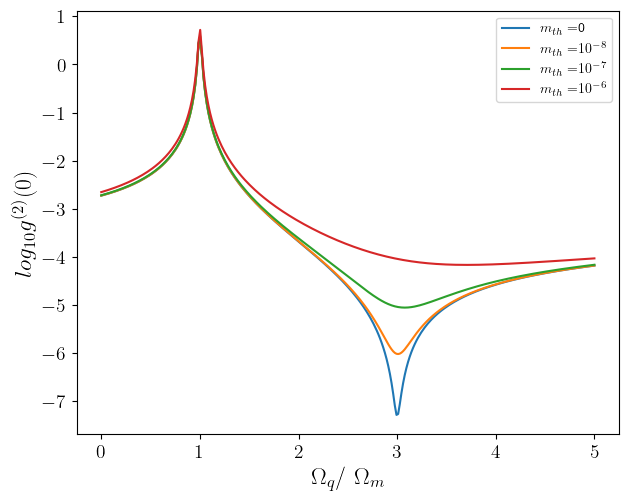

In [ ]:
K= 0.5 * 2*np.pi*10**6
Om=(1/30)*2*np.pi*10**6
Dmin=0
J= 35 * 2*np.pi*10**6
Dp=J
N=10
c=tensor(destroy(2),qeye(N))
m=tensor(qeye(2),destroy(N))
lbl=['0','$10^{-8}$','$10^{-7}$','$10^{-6}$']
x=np.linspace(0,5,300)
y=[0,10**-8,10**-7,10**-6]
xa=[':','--','-.',':']
sd=0
plt.figure(figsize=(7,5.5))
for i in y:
  mth=i
  d=[np.sqrt(K)*c,np.sqrt((1+mth)*K)*m,np.sqrt(mth*K)*m.dag()]
  g=[]
  for k in x:
    Oq= k * Om
    H_eff = (Dp - Dmin) *c.dag()*c  +  (Dp + Dmin) * m.dag()*m +  J * (c.dag()*m+c*m.dag()) + Om * (m.dag()+m) + Oq * (c.dag()+c)
    state=steadystate(H_eff,d)
    e2=expect(m.dag()*m.dag()*m*m,state)
    e1=expect(m.dag()*m,state)
    g.append(np.log10(e2/e1**2))
  plt.plot(x,g,label='$m_{th}=$'+lbl[sd])
  sd+=1
font1 = {'family':'serif','color':'grey','size':20}
font2 = {'family':'serif','color':'black','size':17}
plt.xlabel(" $\\Omega_q$/ $\Omega_m$ ",fontdict=font2)
plt.ylabel(" $log_{10}g^{(2)}(0)$",fontdict=font2)
plt.legend()
plt.savefig("fig 8a.pdf",format='pdf')
plt.show()

#### Fig 8b

<ipython-input-35-8827702a3ff8>:19: RuntimeWarning: overflow encountered in exp
  f = np.exp(h_cut*wm/(kb*T*10**-3))


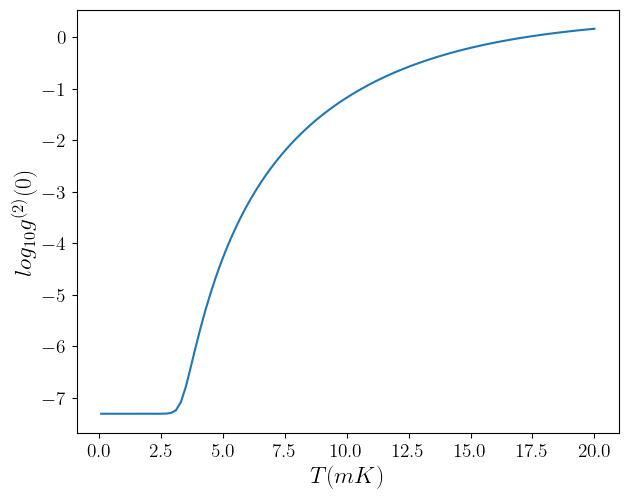

In [ ]:
K = 0.5 * 2*np.pi*10**6
Om = (1/30) * 2*np.pi*10**6
Oq= 3 * Om
Dmin = 0
J = 35 * 2*np.pi*10**6
Dp = J
wm = 1.5 * 2*np.pi* 10 ** 9
N = 20
c = tensor(destroy(2),qeye(N))
m = tensor(qeye(2),destroy(N))

H_eff = (Dp - Dmin) *c.dag()*c  +  (Dp + Dmin) * m.dag()*m +  J * (c.dag()*m+c*m.dag()) + Om * (m.dag()+m) + Oq * (c.dag()+c)

x = np.linspace(0.1,20,100)
g = []
n = []
plt.figure(figsize=(7,5.5))
for T in x:
    f = np.exp(h_cut*wm/(kb*T*10**-3))
    mth = 1 / (f-1)
    d = [np.sqrt(K)*c,np.sqrt((1+mth)*K)*m,np.sqrt(mth*K)*m.dag()]
    state = steadystate(H_eff,d)
    e2 = expect(m.dag()*m.dag()*m*m,state)
    e1 = expect(m.dag()*m,state)
    g.append(np.log10(e2/e1**2))
font1 = {'family':'serif','color':'grey','size':20}
font2 = {'family':'serif','color':'black','size':17}
plt.xlabel(" $T(mK)$ ",fontdict=font2)
plt.ylabel(" $log_{10}g^{(2)}(0)$",fontdict=font2)
plt.plot(x, g)
plt.savefig("fig 8b.pdf",format='pdf')
plt.show()

#### mth vs T

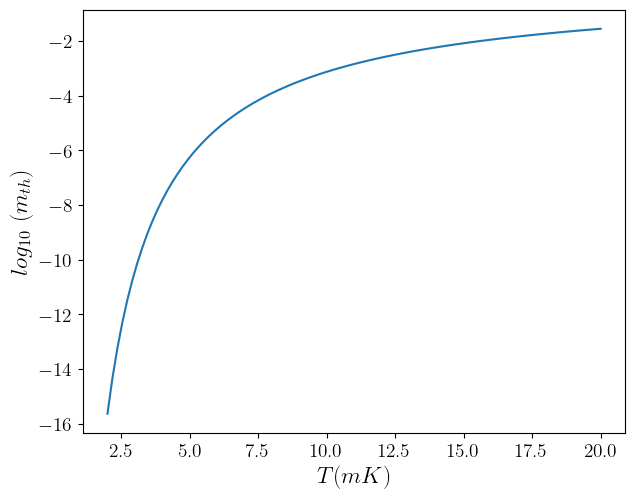

In [ ]:
wm = 1.5 * 2*np.pi* 10 ** 9
x = np.linspace(2,20,100)
n = []
for T in x:
    f = np.exp(h_cut*wm/(kb*T*10**-3))
    mth = 1 / (f-1)
    n.append(np.log10(mth))
plt.figure(figsize=(7,5.5))
plt.plot(x, n)
font2 = {'family':'serif','color':'black','size':17}
plt.xlabel(" $T(mK)$ ",fontdict=font2)
plt.ylabel(" $log_{10}$ $(m_{th})$",fontdict=font2)
plt.savefig("fig 8 extra.pdf",format='pdf')
plt.show()

#### Fig 9a

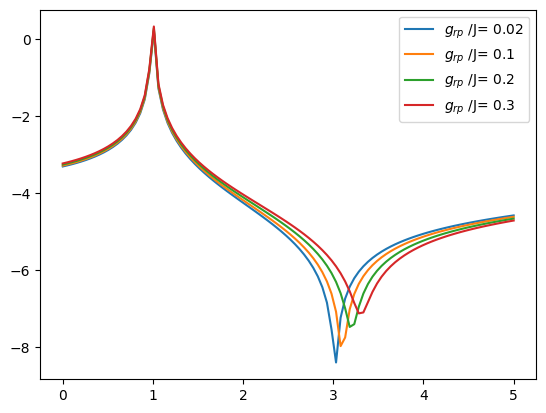

In [ ]:
K= 0.5 * 2*np.pi*10**6
Om=(1/30)*2*np.pi*10**6
Dmin=0
J= 35 * 2*np.pi*10**6
Dp=J
wm = 1.5 * 2*np.pi* 10 ** 9
tm = 0.03 * 10**-9
N=20
c=tensor(destroy(2),qeye(N))
m=tensor(qeye(2),destroy(N))

x = np.linspace(0,5,100)
y = [0.02,0.1,0.2,0.3]
for i in y:
  grp = i * J
  d = [ np.sqrt(K/2) * c , np.sqrt(K/2) * m ]
  g = []
  for k in x:
    Oq= k * Om
    H_eff = (Dp - Dmin) *c.dag()*c  +  (Dp + Dmin) * m.dag()*m +  J * (c.dag()*m+c*m.dag()) + 0.001* grp * c.dag()*c* (m.dag()*np.exp(1j* wm*tm)+m*np.exp(-1j *wm*tm)) + Om * (m.dag()+m) + Oq * (c.dag()+c)
    state = steadystate(H_eff,d)
    e2 = expect(m.dag()*m.dag()*m*m,state)
    e1 = expect(m.dag()*m,state)
    g.append(np.log10(e2/e1**2))
  plt.plot(x,g,label='$g_{rp}$'+' /J= '+str(i))
plt.legend()
plt.show()

#### Fig 9b

In [ ]:
K= 0.5 * 2*np.pi*10**6
Om=(1/30)*2*np.pi*10**6
Dmin=0
J= 35 * 2*np.pi*10**6
Dp=J
wm = 1.5 * 2*np.pi* 10 ** 9
tm = 10**-6
time=np.linspace(0, 10 * tm,20)
N=20
c=tensor(destroy(2),qeye(N))
m=tensor(qeye(2),destroy(N))
y = [ 0.02 , 0.1 , 0.2 , 0.3 ]
rho=tensor(basis(2,0),0.707 * basis(N,1))
def Hef(t):
  H_eff = (Dp - Dmin) *c.dag()*c  +  (Dp + Dmin) * m.dag()*m +  J * (c.dag()*m+c*m.dag()) +  grp * c.dag()*c* (m.dag()*np.exp(1j* wm*tm)+m*np.exp(-1j *wm*tm)) + Om * (m.dag()+m) + Oq * (c.dag()+c)
  return H_eff

for i in y:
  grp = i * J
  d = [ np.sqrt(K/2) * c , np.sqrt(K/2) * m ]
  Oq= 3 * Om
  res = mesolve(H_eff,rho,time,d,[]).states
  g=[]

  #plt.plot(time,g,label='$g_{rp}$'+' / J= '+str(i))
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_ode.py:1011: UserWarning: _zvode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


IntegratorException: Excess work done on this call. Try to increasing the nsteps parameter in the Options class